In [0]:
#Este programa realiza a demonstração de utilização do ML na industria 4.0 para a previsão de falhas de motores de
# aeronaves 

In [1]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded_1 = files.upload()

Saving PM_test.txt to PM_test.txt


In [4]:
uploaded_2 = files.upload()

Saving PM_train.txt to PM_train (1).txt


In [5]:
uploaded_3 = files.upload()

Saving PM_truth.txt to PM_truth (1).txt


In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para tratar os dados em formato de dataframe
import numpy as np # biblioteca utilizada para tratar vetores e matrizesimport matplotlib.pyplot as plt  #utilizapa para construir os gráficos em um formato similar ao "Matlab"
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #utilizada para realizar o preprocessamento dos dados
from sklearn.model_selection import train_test_split #utilizada para realizar o divisão entre dados para treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #utilizada para verificar a acurácia do modelo construído
from sklearn.naive_bayes import GaussianNB # utilizada para construir o modelo de classificação naive_bayes
import seaborn as sns #utilizada para constuir os gráficos em uma forma mais "bonita"
import matplotlib.pyplot as plt #biblioteca para realizar a construção dos gráficos

In [0]:
#lendo o dataset no formato de um dataframe através da função read do pandas
arquivoTeste = 'PM_test.txt' #arquivo que contém os dados para teste do modelo (motor da aeronave sem falha)
arquivoTreinamento="PM_train (1).txt" #contém os dados para treinamento do modelo (falha do motor da aeronave) 100 diferentes motores
arquivoVerdade='PM_truth.txt' #dados reais sobre a vida útil dos motores das aeronaves

In [0]:
dataTeste = pd.read_csv(arquivoTeste, sep=' ',header=None) #realiza a leitura do banco de dados de teste
dataTreinamento = pd.read_csv(arquivoTreinamento, delimiter=' ',header=None ) #realiza a leitura do banco de dados de teste
dataVerdade = pd.read_csv(arquivoVerdade, sep=' ',header=None) #realiza a leitura do banco de dados que contém o "tempo de vida útil" de cada motor em ciclos

In [13]:
dataTeste.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [0]:
#retirando os dados que não interessam
dataTreinamento=dataTreinamento.drop(dataTreinamento.columns[26:28],axis=1)
dataTeste=dataTeste.drop(dataTeste.columns[26:28],axis=1)
dataVerdade=dataVerdade.drop(dataVerdade.columns[1],axis=1)

In [0]:
#adicionando o cabeçalho ao dataset
dataTreinamento.columns=["id","cycle","setting1","setting2","setting3","s1","s2","s3","s4","s5","s6","s7","s8","s9",
                         "s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]
dataTeste.columns=["id","cycle","setting1","setting2","setting3","s1","s2","s3","s4","s5","s6","s7","s8","s9",
                         "s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]
dataVerdade.columns=["RLU"] #remaining useful life (RUL) - tempo de vida útil

In [17]:
# print dos dataset
dataTreinamento.head(5) #100 diferentes motores com 21 sensores em cada um dos motores

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [19]:
len(dataTreinamento.groupby("id").count())

100

In [20]:
dataTreinamento.tail(10)  #print das 10 ultimas linhas do dataset

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20621,100,191,-0.0005,-0.0000,100.0,518.67,643.69,1610.87,1427.19,14.62,21.61,551.78,2388.26,9068.90,1.3,48.07,519.80,2388.28,8143.56,8.5092,0.03,398,2388,100.0,38.39,23.1218
20622,100,192,-0.0009,0.0001,100.0,518.67,643.53,1601.23,1419.48,14.62,21.61,551.14,2388.17,9060.45,1.3,48.18,520.59,2388.21,8143.46,8.4892,0.03,397,2388,100.0,38.56,23.0770
20623,100,193,-0.0001,0.0002,100.0,518.67,643.09,1599.81,1428.93,14.62,21.61,552.04,2388.29,9067.57,1.3,48.19,520.11,2388.19,8142.02,8.5424,0.03,397,2388,100.0,38.47,23.0230
20624,100,194,-0.0011,0.0003,100.0,518.67,643.72,1597.29,1427.41,14.62,21.61,551.99,2388.23,9068.85,1.3,48.12,519.55,2388.22,8139.67,8.5215,0.03,394,2388,100.0,38.38,23.1324
20625,100,195,-0.0002,-0.0001,100.0,518.67,643.41,1600.04,1431.90,14.62,21.61,551.42,2388.23,9069.69,1.3,48.22,519.71,2388.28,8142.90,8.5519,0.03,394,2388,100.0,38.14,23.1923
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [21]:
dataTeste.head(5) #100 diferentes motores com 21 sensores em cada um dos motores

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [22]:
dataVerdade.head(5) #tempo de vida restante de cada um dos motores (por exemplo, o motor 1 tem mais 112 ciclos de vida)

,RLU
0,112
1,98
2,69
3,82
4,91


**Conhecendo o Banco de Dados**

In [23]:
#procurando por outliers
dataTreinamento.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [0]:
#retirando alguns sensores para facilitar a análise
dataTreinamentoNew=dataTreinamento.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'setting3'], axis=1)
dataTesteNew=dataTeste.drop(['s1', 's5', 's10', 's16', 's18', 's19', 'setting3'], axis=1)

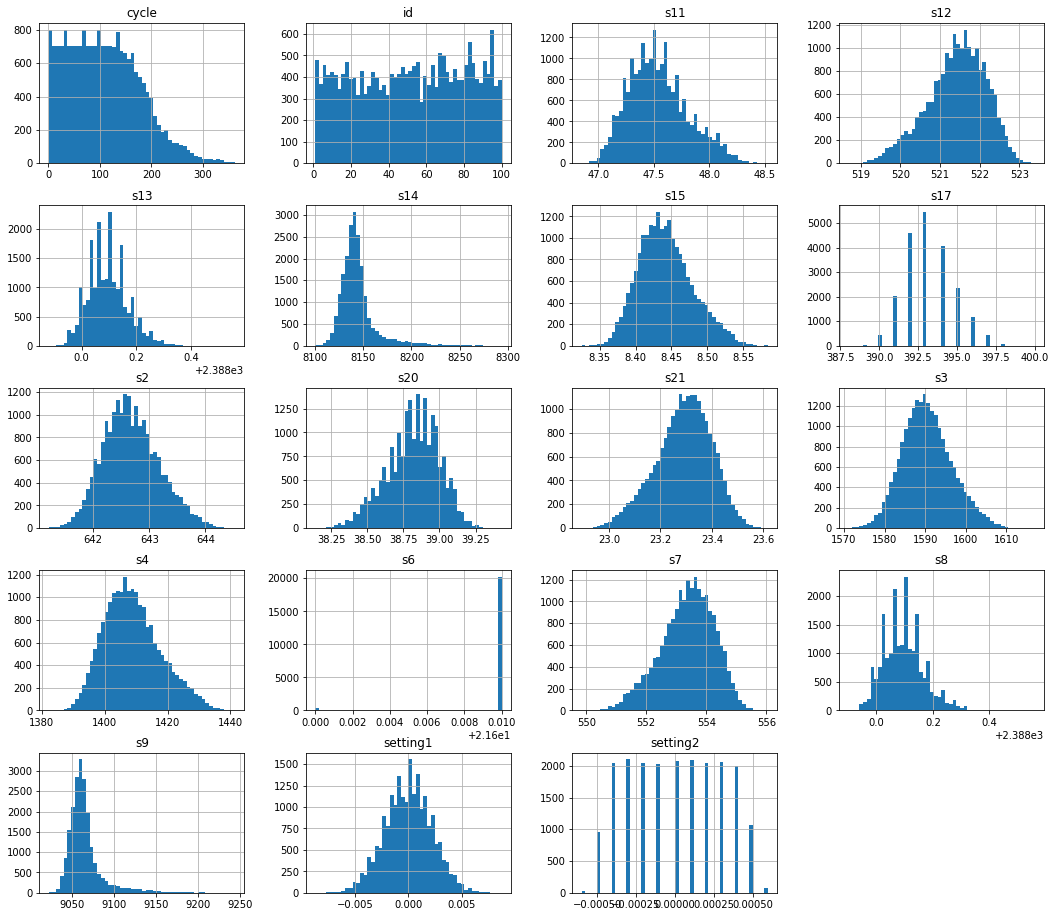

In [25]:
#Gerando histograma para visualizar algumas variáveis 
dataTreinamentoNew.hist(bins=50, figsize=(18,16))
plt.show()

In [0]:
cyclestrain = dataTreinamentoNew.groupby('id', as_index=False)['cycle'].max() #quantidade de ciclos de cada motor - (tempo de funcionamento)
cyclestest = dataTesteNew.groupby('id', as_index=False)['cycle'].max() #quantidade de ciclos de cada motor - (tempo de funcionamento)

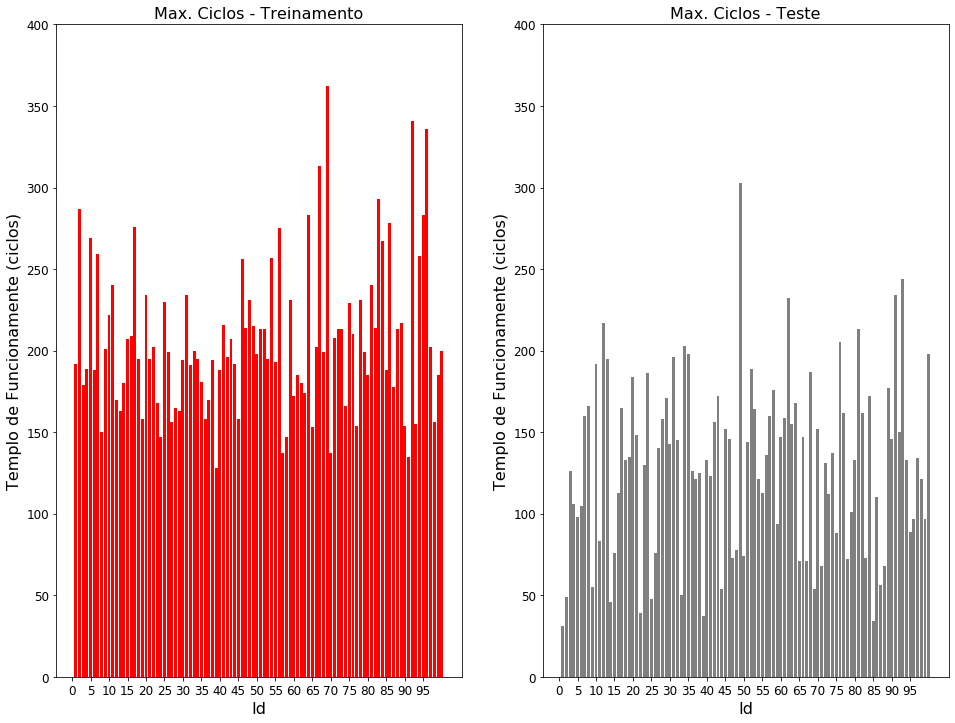

In [28]:
#plot das figuras que contém a quantidade de ciclos (tempo de vida) para cada motor
fig = plt.figure(figsize = (16,12))
fig.add_subplot(1,2,1)
bar_labels = list(cyclestrain['id'])
bars = plt.bar(list(cyclestrain['id']), cyclestrain['cycle'], color='red')
plt.ylim([0, 400])
plt.xlabel('Id', fontsize=16)
plt.ylabel('Templo de Funcionamente (ciclos)', fontsize=16)
plt.title('Max. Ciclos - Treinamento', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
fig.add_subplot(1,2,2)
bars = plt.bar(list(cyclestest['id']), cyclestest['cycle'], color='grey')
plt.ylim([0, 400])
plt.xlabel('Id', fontsize=16)
plt.ylabel('Templo de Funcionamente (ciclos)', fontsize=16)
plt.title('Max. Ciclos - Teste', fontsize=16)
plt.xticks(np.arange(min(bar_labels)-1, max(bar_labels)-1, 5.0), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Encontrando o tempo de vida restante para cada motor.**

In [0]:
dataTreinamentoNew = pd.merge(dataTreinamentoNew, dataTreinamentoNew.groupby('id', as_index=False)['cycle'].max(), how='left', on='id') # cria o dataset que contém os valores máximos para cada 
#motor

In [30]:
dataTreinamentoNew.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,cycle_y
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192


In [0]:
dataTreinamentoNew.rename(columns={"cycle_x": "cycles", "cycle_y": "maxcycles"}, inplace=True) #renomeia as colunas que foram adicionadas

In [32]:
dataTreinamentoNew.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192


**Criando a coluna que indica o tempo para falha (TTF) do motor**

In [33]:
dataTreinamentoNew['TTF'] = dataTreinamentoNew['maxcycles'] - dataTreinamentoNew['cycles']  #cria a coluna que contém o "resto de vida" a cada ciclo do motor
dataTreinamentoNew.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187


**Preparando os dados**

In [0]:
#aplicando a normalização
scaler = MinMaxScaler()  #objeto para aplicar a normalização entre 0 e 1

In [35]:
treinaNormalizado = dataTreinamentoNew.copy()  #realizando uma cópia do dataset para selecionar os dados de entrada para o treinamento
treinaNormalizado.iloc[:,2:19] = scaler.fit_transform(treinaNormalizado.iloc[:,2:19]) #seleciona todas as linhas e as colunas de 2 até a ultima (cycles até s21)
treinaNormalizado.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,192,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,192,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,192,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,192,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,192,187


In [36]:
#realizando o mesmo procedimento para os dados de teste
testeNormalizado = dataTesteNew.copy()  #realiza a cópia do dataset de treinamento
testeNormalizado.iloc[:,2:19] = scaler.transform(testeNormalizado.iloc[:,2:19])
testeNormalizado.head()

,id,cycle,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,0.632184,0.750000,0.545181,0.310661,0.269413,1.0,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,1,2,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,1,3,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,1,4,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,1,5,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377


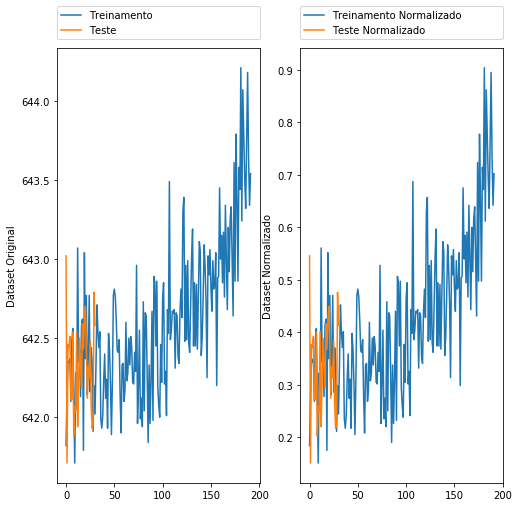

In [37]:
# exibindo os dados de treinamento e teste
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(dataTreinamentoNew[dataTreinamentoNew.id==1].s2)  #plota os dados do sensor 2 para o motor 1
plt.plot(dataTesteNew[dataTesteNew.id==1].s2) #plota os dados do sensor 2 para o motor 1
plt.legend(['Treinamento','Teste'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Dataset Original')
fig.add_subplot(1,2,2)
plt.plot(treinaNormalizado[treinaNormalizado.id==1].s2) #plota os dados do sensor 2 para o motor 1
plt.plot(testeNormalizado[testeNormalizado.id==1].s2) #plota os dados do sensor 2 para o motor 1
plt.legend(['Treinamento Normalizado','Teste Normalizado'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Dataset Normalizado')
plt.show()

**Encontrando os valores para falha em cada ciclo**

In [0]:
#função que encontra a fração correspondente ao tempo de vida do motor 
def fracaoDoTTF(dfMotor,q):
    return(dfMotor.TTF[q]-dfMotor.TTF.min()) / float(dfMotor.TTF.max()-dfMotor.TTF.min())  #encontra a fração, utilizando os valores de máximo TFF e mínimo TTF

In [0]:
#aplica a função para cada um dos 100 motores existentes
fTTFz = [] #lista auxiliar para o tempo de falha
fTTF = []  # lista que contém a fração do tempo de falha para cada motor em cada ciclo

#for utilizado para computar a fração do tempo de vida restante para cada um dos motores (no início a fração do tempo de vida é 1 e cai até 0 quando o motor falha)
for i in range(dataTreinamentoNew['id'].min(),dataTreinamentoNew['id'].max()+1):  #esse for cria um "iterable" entre o menor valor de id(1) até o maior valor (100)+1
    dat=dataTreinamentoNew[dataTreinamentoNew.id==i] #seleciona cada um dos id presentes no dataset
    dat = dat.reset_index(drop=True) #
    for q in range(len(dat)): #utilizado para aplicar a transformação em fração sobre cada um dos ciclos 
        fTTFz = fracaoDoTTF(dat, q) #aplica a função que "normaliza" os dados de tempo de vida 
        fTTF.append(fTTFz)  #adiciona à lista de tempo restante de vida
treinaNormalizado['fTTF'] = fTTF

In [40]:
treinaNormalizado.head()  # fTTF varia de 1 a 0

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,TTF,fTTF
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,192,191,1.000000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,192,190,0.994764
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,192,189,0.989529
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,192,188,0.984293
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,192,187,0.979058


**Aplicando o modelo de previsão de falhas**

In [0]:
#selecionando os dados de entrada a saída
X_train = treinaNormalizado.values[:,1:19]  #seleciona todas as linhas e as colunas de "cycles" até s21 para a entrada do treinamento
Y_train = treinaNormalizado.values[:, 21]  #seleciona todas as linhas e a coluna de fTTF para a saída (target) do treinamento
X_test = testeNormalizado.values[:,1:19]  #seleciona todas as linhas e as colunas de "cycles" até s21 para a entrada de teste

In [43]:
X_train

array([[1.00000000e+00, 4.59770115e-01, 1.66666667e-01, ...,
        3.33333333e-01, 7.13178295e-01, 7.24661696e-01],
       [2.00000000e+00, 6.09195402e-01, 2.50000000e-01, ...,
        3.33333333e-01, 6.66666667e-01, 7.31013532e-01],
       [3.00000000e+00, 2.52873563e-01, 7.50000000e-01, ...,
        1.66666667e-01, 6.27906977e-01, 6.21375311e-01],
       ...,
       [1.98000000e+02, 5.22988506e-01, 5.00000000e-01, ...,
        8.33333333e-01, 2.32558140e-01, 5.39906103e-02],
       [1.99000000e+02, 4.36781609e-01, 7.50000000e-01, ...,
        5.83333333e-01, 1.16279070e-01, 2.34465617e-01],
       [2.00000000e+02, 3.16091954e-01, 8.33333333e-02, ...,
        6.66666667e-01, 1.78294574e-01, 2.18171776e-01]])

In [44]:
Y_train

array([1.        , 0.9947644 , 0.9895288 , ..., 0.01005025, 0.00502513,
       0.        ])

**Através desses dados históricos de funcionamento normal e de falhas, é possível prever quando ocorrerá a próxima falha do motor?**

In [45]:
#importando outras bibliotecas
import tensorflow as tf  #importando o tensorflow para ser utilizado como backend do treinamento
from tensorflow.keras.models import Sequential,load_model  #importando os modelos sequenciais e a função para carregar o modelo
from tensorflow.keras.layers import Dense, Dropout, LSTM #importando as camadas Densa, Dropout e LSTM

In [46]:
#criando o modelo sequencial para a classificação
modeloMLP = Sequential()  #cria o objeto para o modelo sequencial
modeloMLP.add(Dense(6, input_dim=18, kernel_initializer='normal', activation='relu')) #cria a camada de entrada - na camada de entrada é necessário definir a dimensão da entrada
                                                                                  # para os nossos dados, utilizamos 18 entradas e essa camada que é completamente conectada (Dense)
                                                                                  # possui 6 neurônios
modeloMLP.add(Dense(12, kernel_initializer='normal', activation='relu')) #camada escondida
modeloMLP.add(Dropout(0.2))  #camada de dropout utilizada para reduzir o overfiting 
modeloMLP.add(Dense(1, kernel_initializer='normal')) #adiciona a camada de saída que contém apenas 1 neurônio (classificação binária)
modeloMLP.compile(loss='mean_squared_error', optimizer='adam')  #define qual deve ser a função perda utilizada e qual o otimizador a ser utilizado

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [47]:
modeloMLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 114       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [48]:
#realiza o treinamento do modelo
modeloMLP.fit(X_train, Y_train, nb_epoch=50)  #define as entradas e saídas e o número de épocas de treinamento

Train on 20631 samples
Epoch 1/50
20631/20631 [==============================] - 1s 65us/sample - loss: 0.0620
Epoch 2/50
20631/20631 [==============================] - 1s 43us/sample - loss: 0.0150
Epoch 3/50
20631/20631 [==============================] - 1s 43us/sample - loss: 0.0117
Epoch 4/50
20631/20631 [==============================] - 1s 41us/sample - loss: 0.0105
Epoch 5/50
20631/20631 [==============================] - 1s 42us/sample - loss: 0.0100
Epoch 6/50
20631/20631 [==============================] - 1s 41us/sample - loss: 0.0099
Epoch 7/50
20631/20631 [==============================] - 1s 40us/sample - loss: 0.0100
Epoch 8/50
20631/20631 [==============================] - 1s 42us/sample - loss: 0.0098
Epoch 9/50
20631/20631 [==============================] - 1s 40us/sample - loss: 0.0097
Epoch 10/50
20631/20631 [==============================] - 1s 38us/sample - loss: 0.0098
Epoch 11/50
20631/20631 [==============================] - 1s 39us/sample - loss: 0.0097
Epoch 1

**Realizando a previsão do modelo**

In [0]:
#aplica a previsão para modelo
previsao = modeloMLP.predict(X_test)

In [50]:
print(previsao.min(), previsao.max()) #os dados de previsão do RLU devem estar entre os valores 0 e 1 

0.065926135 0.99144053


In [51]:
X_test

array([[  1.        ,   0.63218391,   0.75      , ...,   0.33333333,
          0.55813953,   0.66183375],
       [  2.        ,   0.34482759,   0.25      , ...,   0.41666667,
          0.68217054,   0.68682684],
       [  3.        ,   0.51724138,   0.58333333, ...,   0.41666667,
          0.72868217,   0.72134769],
       ...,
       [196.        ,   0.46551724,   0.25      , ...,   0.58333333,
          0.37209302,   0.4293013 ],
       [197.        ,   0.2816092 ,   0.58333333, ...,   0.58333333,
          0.40310078,   0.51877934],
       [198.        ,   0.57471264,   0.75      , ...,   0.66666667,
          0.43410853,   0.40223695]])

In [52]:
#cria o novo dataset completo para o teste
dataTesteNew = pd.merge(dataTesteNew, dataTesteNew.groupby('id', as_index=False)['cycle'].max(), how='left', on='id') #agrupa o dataset de teste inicial com os resultados obtidos
dataTesteNew.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,cycle_y
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31


In [0]:
#modifica os nomes para facilitar a análise
dataTesteNew.rename(columns={"cycle_x": "cycles", "cycle_y": "maxcycles"}, inplace=True)
dataTesteNew['score'] = previsao

In [54]:
dataTesteNew.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,0.963740
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,0.967936
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,0.963959
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,0.948434
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,0.957293


In [0]:
#função para retornar os valores em escala anterior
def totcycles(data):
    return(data['cycles'] / (1-data['score']))
    

In [56]:
dataTesteNew['maxpredcycles'] = totcycles(dataTesteNew) #aplica a função
dataTesteNew.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score,maxpredcycles
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,0.963740,27.578230
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,0.967936,62.375443
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,0.963959,83.237656
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,0.948434,77.570038
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,0.957293,117.075607


In [0]:
#função para encontrar o tempo de vida dos motores baseados nos dados de entrada
def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

In [58]:
dataTesteNew['RUL'] = RULfunction(dataTesteNew) #aplica a função de transformação "retorno" dos dados
dataTesteNew.head()

,id,cycles,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score,maxpredcycles,RUL
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31,0.963740,27.578230,-3.421770
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31,0.967936,62.375443,31.375443
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31,0.963959,83.237656,52.237656
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31,0.948434,77.570038,46.570038
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31,0.957293,117.075607,86.075607


In [59]:
t = dataTesteNew.columns == 'RUL' #utilizado para encontrar a posição do dataset que corresponde ao valor RUL
ind = [i for i, x in enumerate(t) if x] #neste cado a posição é a coluna 22

predictedRUL = []  #lista para os valores rpevisto de RUL para cada um dos motores

#for utilizado para percorrer cada um dos motores e encontrar o valor da previsão 
for i in range(dataTesteNew["id"].min(), dataTesteNew["id"].max()+1):
    npredictedRUL=dataTesteNew[dataTesteNew.id==i].iloc[dataTesteNew[dataTesteNew.id==i].cycles.max()-1,ind]  #seleciona cada um dos id de motores e encontra qual é o RUL
    predictedRUL.append(npredictedRUL) #adiciona para a lista de valores previstos
    
predictedRUL[0:10]  #imprime os RUL para os 10 primeiros id (já no fortamo final)


[RUL    145.137085
 Name: 30, dtype: float64, RUL    138.148743
 Name: 79, dtype: float64, RUL    68.831039
 Name: 205, dtype: float64, RUL    83.471878
 Name: 311, dtype: float64, RUL    98.176651
 Name: 409, dtype: float64, RUL    97.909546
 Name: 514, dtype: float64, RUL    122.716339
 Name: 674, dtype: float64, RUL    86.199677
 Name: 840, dtype: float64, RUL    127.626068
 Name: 895, dtype: float64, RUL    116.851196
 Name: 1087, dtype: float64]

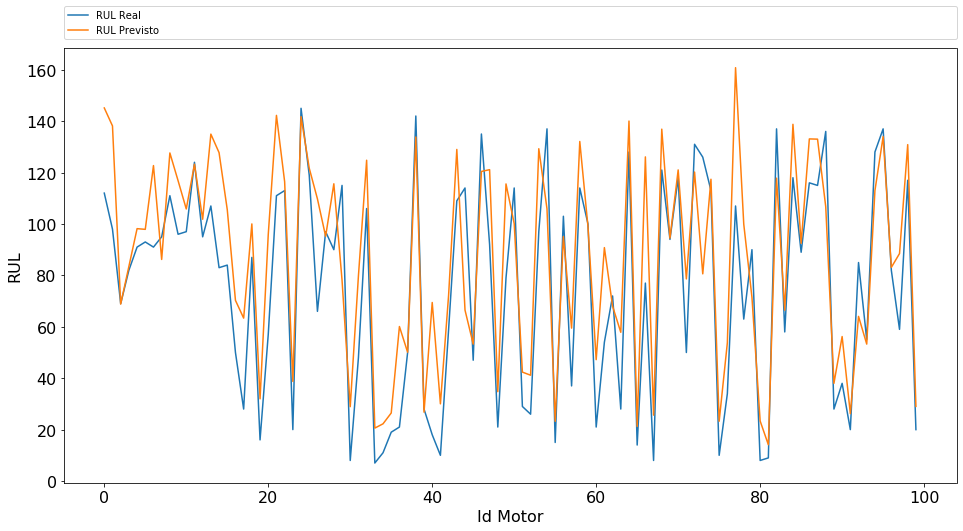

In [60]:
#plot da figura comparativa entre os valores reais e previstos para a manutenção/troca dos motores
plt.figure(figsize = (16, 8))
plt.plot(dataVerdade)
plt.plot(predictedRUL)
plt.xlabel('Id Motor', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['RUL Real','RUL Previsto'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [0]:
predictedRUL

[RUL    159.459717
 Name: 30, dtype: float64, RUL    141.793182
 Name: 79, dtype: float64, RUL    70.822769
 Name: 205, dtype: float64, RUL    88.789124
 Name: 311, dtype: float64, RUL    107.682175
 Name: 409, dtype: float64, RUL    107.911591
 Name: 514, dtype: float64, RUL    119.214111
 Name: 674, dtype: float64, RUL    80.451553
 Name: 840, dtype: float64, RUL    130.503464
 Name: 895, dtype: float64, RUL    106.017242
 Name: 1087, dtype: float64, RUL    105.020187
 Name: 1170, dtype: float64, RUL    103.054199
 Name: 1387, dtype: float64, RUL    89.158417
 Name: 1582, dtype: float64, RUL    140.733932
 Name: 1628, dtype: float64, RUL    139.459167
 Name: 1704, dtype: float64, RUL    113.747391
 Name: 1817, dtype: float64, RUL    66.691254
 Name: 1982, dtype: float64, RUL    65.624527
 Name: 2115, dtype: float64, RUL    102.862137
 Name: 2250, dtype: float64, RUL    30.572128
 Name: 2434, dtype: float64, RUL    104.889557
 Name: 2582, dtype: float64, RUL    149.569427
 Name: 2621,

In [0]:
dataVerdade.head()

,RLU
0,112
1,98
2,69
3,82
4,91


**Continuando ....**

In [0]:
dataVerdade = pd.read_csv(arquivoVerdade, sep=' ',header=None) #realiza a leitura do banco de dados que contém o "tempo de vida útil" de cada motor em ciclos

In [0]:
#comparação entre a previsão e o valor real
xtrueRUL = list(dataVerdade.loc[:,0]) #seleciona todas as linhas do dataset RUL que contém os valores reais de ciclos para os motores 
otrueRUL = [] #lista auxiliar 

#for utilizado para concatenar, em sentido inverso os valores reais de RUL
for i in range(0,len(xtrueRUL)):
    otrueRUL = np.concatenate((otrueRUL, list(reversed(np.arange(xtrueRUL[i])))))

In [0]:
xpredictedRUL = list(round(x) for x in predictedRUL) #arredonda os valores obtidos para um valor inteiro, pois não existem ciclos fracionados
opredictedRUL = []

In [0]:
xpredictedRUL[0:10]

[RUL    159.0
 Name: 30, dtype: float64, RUL    142.0
 Name: 79, dtype: float64, RUL    71.0
 Name: 205, dtype: float64, RUL    89.0
 Name: 311, dtype: float64, RUL    108.0
 Name: 409, dtype: float64, RUL    108.0
 Name: 514, dtype: float64, RUL    119.0
 Name: 674, dtype: float64, RUL    80.0
 Name: 840, dtype: float64, RUL    131.0
 Name: 895, dtype: float64, RUL    106.0
 Name: 1087, dtype: float64]

In [0]:
#for que encontra para cada um dos motores os valores previstos 
for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i].values[0])))))